In [2]:
#Today we will do classification of handwritten digits MNIST dataset using KNN (K nearest neighbour)
from sklearn.datasets import load_digits

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [5]:
#What this does:
#We load all the necessary libraries for:

#Data loading

#Visualization

#Model building

#Evaluation

In [6]:
digits = load_digits()
X = digits.data
y = digits.target

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (1797, 64)
Target shape: (1797,)


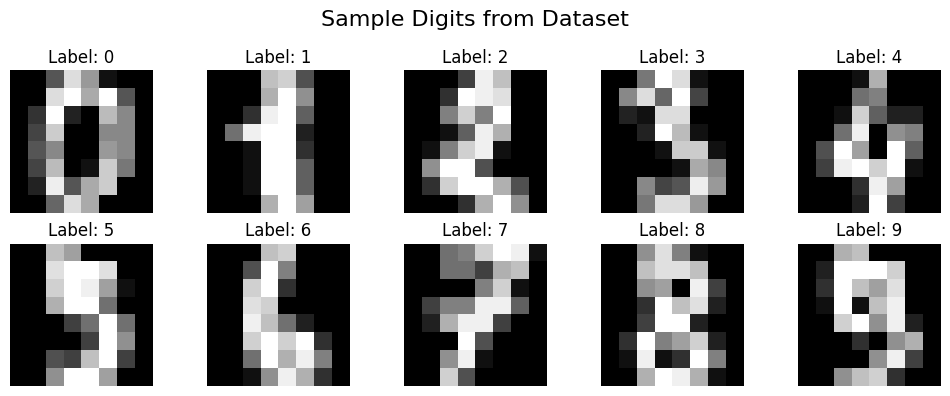

In [8]:
plt.figure(figsize=(10, 4)) #creates new figure for plotting 10 unitswide,4 units tall
for i in range(10):
    plt.subplot(2, 5, i+1) #This line tells Matplotlib to create a subplot (a small plot within a larger figure)
    plt.imshow(digits.images[i], cmap='gray')#Displays the actual 8x8 image for digit i
    plt.title(f"Label: {digits.target[i]}") #Sets the title above each image, showing the actual digit label (e.g., "Label: 7")
    plt.axis('off') #Hides the x and y axes (ticks and numbers) for cleaner look — makes the image stand out
plt.suptitle("Sample Digits from Dataset", fontsize=16) #Adds a main title to the whole figure — "super title"
plt.tight_layout() #Automatically adjusts spacing between subplots so they don’t overlap
plt.show()


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [11]:
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9833333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      1.00      0.99        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.97      0.98        30
           9       0.97      0.93      0.95        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



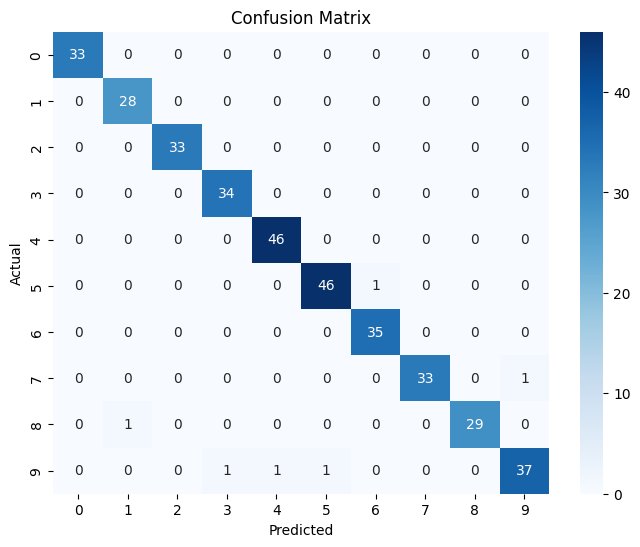

In [12]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


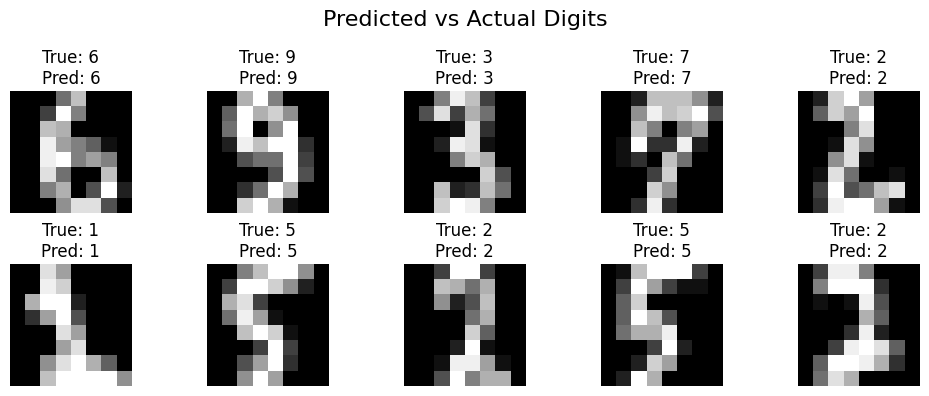

In [13]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {y_pred[i]}")
    plt.axis('off')
plt.suptitle("Predicted vs Actual Digits", fontsize=16)
plt.tight_layout()
plt.show()
